# Information 
* Machine Learning Exercise 1
* Shahar Michaeli
* https://www.kaggle.com/shaharmichaeli/

 As a part of Machine Learning course ,  We want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.
 he values in the second column ("Survived") can be used to determine whether each passenger survived or not:

* if it's a "1", the passenger survived.
* if it's a "0", the passenger died.

There are two important files in the data: (1) train.csv, (2) test.csv.


In [1]:
# Section 1 - Imports libraries
import math
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import plotly.offline as py
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Data Anlysis

In [2]:
# Import dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
print("Shape of dataframe : ",df.shape)
print("Columns:",end = " ")
for i in df.columns:
    print(i,end= ", ")

Shape of dataframe :  (891, 12)
Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, 

### **The shape of the dataset is : 891 observation, 12 different variables.**
1. Survival -	0 = No, 1 = Yes
2. Pclass	 - Ticket class	 - 1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex - Male or female
4. Age - Age in years	
5. Sibsp - Number of siblings / spouses aboard the Titanic	
6. Parch - Number of parents / children aboard the Titanic	
7. Ticket - Ticket number	
8. Fare - Passenger fare	
9. Cabin - Cabin number	
10. Embarked - Port of Embarkation

In [4]:
display(df)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
# Pandas profiling is very useful tool to get a lot of information about the dataframe and its Exploratory Data Analysis procces.
report = pandas_profiling.ProfileReport(df)
report_test = pandas_profiling.ProfileReport(test_df)

# EDA Pands Profile - Train dataframe

In [6]:
display(report)


# EDA Pands Profile - Test dataframe

In [7]:
display(report_test)

# Conclusions from EDA Pandas Profile
* We can understand from Panda Profile that 8.1% (861 cells) from the dataset are missing.
* 72.3% from the observations embarked at Southmapton.
* We can assume as much as age is higher , the siblings / spouses is lower.
* Missing Observations : 20% from Age, 80% from Cabin.
* Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male
* Age Category is kind of normal distirbution, mean of age is ~30,standard deviation is ~15. The oldest age is 80, against 0.42 age which is baby.
* The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.
* According to the "SibSp" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship.

In [8]:
# Creating different datasets for survivors and non-survivors
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

In [9]:
df_survivors_sex = df_survivors['Sex'].value_counts()
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()
df_nonsurvivors_sex = pd.DataFrame({'Sex':df_nonsurvivors_sex.index, 'count':df_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = df_survivors_sex['Sex'],
   values = df_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['orange', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = df_nonsurvivors_sex['Sex'],
   values = df_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'orange'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.22, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.79, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

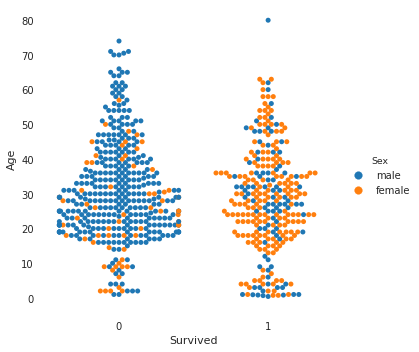

In [10]:
#Categorial variable 'Survived' against age numeric.
sns.catplot(x='Survived',y='Age',hue="Sex",data=df,kind='swarm')



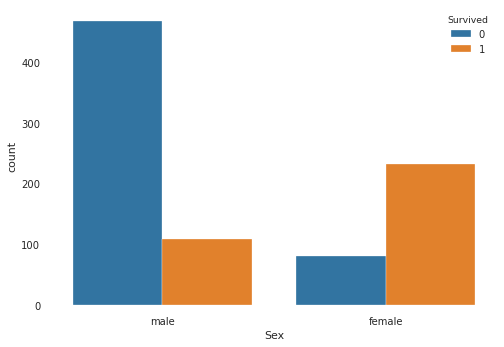

In [11]:
g = sns.countplot(x="Sex",hue="Survived",data=df)

#### Conclusion from Survived and Age and Gender :
* Most of deaths gender are Male ~85.2%.
* Most of the dead are in the 20-30 age range.
* The count of females are higher then males which are survived.


#### Pclass - how it imply about survivors and non survivors?

In [12]:
df_survivors_pclass = df_survivors['Pclass'].value_counts()
df_survivors_pclass = pd.DataFrame({'Pclass':df_survivors_pclass.index, 'count':df_survivors_pclass.values})

# Taking the count of each Pclass value inside the Survivors
df_nonsurvivors_pclass = df_nonsurvivors['Pclass'].value_counts()
df_nonsurvivors_pclass = pd.DataFrame({'Pclass':df_nonsurvivors_pclass.index, 'count':df_nonsurvivors_pclass.values})


b1 = go.Bar(
    x = df_survivors_pclass['Pclass'],
    y = df_survivors_pclass['count'],
    text = "Survived")

b2 = go.Bar(
    x = df_nonsurvivors_pclass['Pclass'],
    y = df_nonsurvivors_pclass['count'],
    text = "Not Survived")
data = [b1,b2]
layout = go.Layout(barmode = "group",title='"Pclass" from Survivors vs non-Survivors')
fig = go.Figure(data = data, layout = layout)

fig.show()

#### Conclusions from Survived Rate against Pclass :
* The highest rate of survive is at first class.
* The highest death rate is at third-class.

#### Embark - how it imply about survivors and non survivors?

In [13]:
#Survived and Embark

survived_embark_not_survived = pd.DataFrame()
survived_embark_not_survived['City'] = ['C','Q','S']
survived_embark_not_survived['Survived'] = ['Not_Survived']*3
survived_embark_not_survived['Amount'] = (list(df[df['Survived'] == 0].groupby('Embarked').agg('count')['Survived']))

survived_embark_survived = pd.DataFrame()
survived_embark_survived['City'] = ['Q','C','S']
survived_embark_survived['Survived'] = ['Survived']*3
survived_embark_survived['Amount'] = (list(df[df['Survived'] == 1].groupby('Embarked').agg('count')['Survived']))


b1 = go.Bar(
    x = survived_embark_not_survived['City'],
    y = survived_embark_not_survived['Amount'],
    text = "Not Survived")
b2 = go.Bar(
    x = survived_embark_survived['City'],
    y = survived_embark_survived['Amount'],
    text = "Survived")
                                           
                                           
data = [b1,b2]
layout = go.Layout(barmode = "group",title='Embarkes - Survivors vs non-Survivors')
fig = go.Figure(data = data, layout = layout)

fig.show()

In [14]:
# Another plot , 2 categorical variables , Survived and Embarked.
#g = sns.countplot(x="Embarked", hue="Survived",data=df)

# Prepare for Logistic Regression 

Columns such as Name, Ticket and Cabin doesn't influence on the results and i guess drop them make it better.
'Cabin' column got 77.1% missing value, and it is very unique information.
'Ticket' column has 681 (out of 891) different values which is 76.4%.
'Name' column is obviously unique for each one.




In [15]:
data_SGD = df.copy()
data_test_SGD = test_df.copy()

data_SGD = data_SGD.drop(['Name','Ticket','Cabin'], axis=1)
data_test_SGD = data_test_SGD.drop(['Name','Ticket','Cabin'], axis=1)

Encode the categorical columns such as Sex,Embarked and see how it influence about the results.

In [16]:
embarked_map = {"S": 0, "C": 1, "Q": 2}
sex_map = {"male": 0, "female": 1}

data_SGD['Embarked'] = data_SGD['Embarked'].map(embarked_map)
data_SGD['Sex'] = data_SGD['Sex'].map(sex_map)
data_test_SGD['Embarked'] = data_test_SGD['Embarked'].map(embarked_map)
data_test_SGD['Sex'] = data_test_SGD['Sex'].map(sex_map)



## Fill Missing Value (NaN)
Embarked feature takes S, Q, C values. Our training dataset has two missing values. Instead of throwing the whole lines , lets fill the most common value, which is S.
Which is doesn't effect on the whole result.
'S' Equal to '0' map value.

In [17]:
data_SGD['Embarked'] = data_SGD['Embarked'].fillna(0)
data_SGD = data_SGD.astype({"Embarked":int})

data_test_SGD['Embarked'] = data_test_SGD['Embarked'].fillna(0)
data_test_SGD = data_test_SGD.astype({"Embarked":int})


### There is **one** NaN value in test dataframe in 'Fare' feature, we can complete the missing value with the mean of the feature.

In [18]:
data_test_SGD['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

Age features takes numeric values, got a lot of missing values (~19%).
To fill the missing values such as the Embarked feature column , the best option instead drop the lines is to fill with the mean of this column.


In [19]:
age_mean = data_SGD['Age'].mean(skipna=True)
data_SGD['Age'] = data_SGD['Age'].fillna(age_mean)

age_mean = data_test_SGD['Age'].mean(skipna=True)
data_test_SGD['Age'] = data_test_SGD['Age'].fillna(age_mean)


In [20]:
display(data_SGD)
display(data_test_SGD)

PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.000000      1      0   7.2500   
1              2         1       1    1  38.000000      1      0  71.2833   
2              3         1       3    1  26.000000      0      0   7.9250   
3              4         1       1    1  35.000000      1      0  53.1000   
4              5         0       3    0  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    0  27.000000      0      0  13.0000   
887          888         1       1    1  19.000000      0      0  30.0000   
888          889         0       3    1  29.699118      1      2  23.4500   
889          890         1       1    0  26.000000      0      0  30.0000   
890          891         0       3    0  32.000000      0      0   7.7500   

     Embarked  
0           0  
1           1  
2           0  
3           0  
4           0  
..        ...  
886         0  
887         0  
888         0  
889         1  
890         2  

[891 rows x 9 columns]

PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    0  34.50000      0      0    7.8292         2
1            893       3    1  47.00000      1      0    7.0000         0
2            894       2    0  62.00000      0      0    9.6875         2
3            895       3    0  27.00000      0      0    8.6625         0
4            896       3    1  22.00000      1      1   12.2875         0
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    0  30.27259      0      0    8.0500         0
414         1306       1    1  39.00000      0      0  108.9000         1
415         1307       3    0  38.50000      0      0    7.2500         0
416         1308       3    0  30.27259      0      0    8.0500         0
417         1309       3    0  30.27259      1      1   22.3583         1

[418 rows x 8 columns]

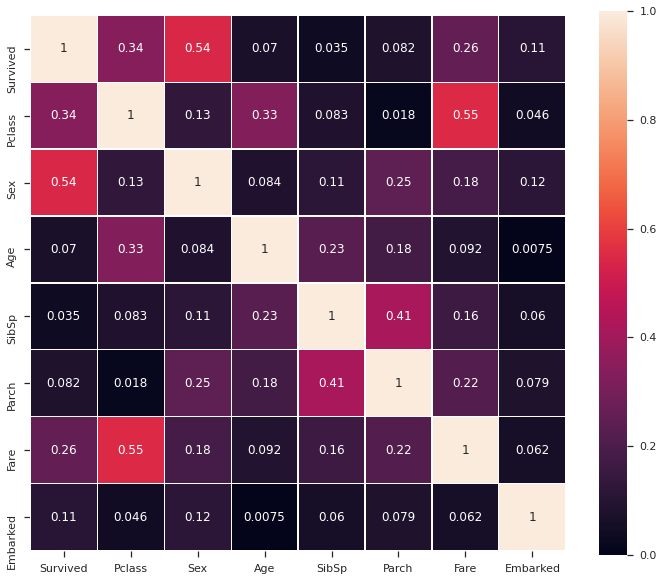

In [21]:
df_to_corr = data_SGD.copy()
df_to_corr = df_to_corr.drop(['PassengerId'],axis = 1)

sns.set(style='ticks', color_codes=True)
cor = np.abs(df_to_corr.corr())
plt.figure(figsize=(12, 10))
sns.heatmap(cor,linewidths=0.1,square=True,linecolor='white',annot=True,vmin=0,vmax=1)
plt.show()

### Correlation conclusions
* Pclass has a high correlation with the fare, which makes sense - the first-class cost more, obviously. Also, Pclass has a high correlation with the age, youngest people can't effort ticket for first class.
* Survived has a very high correlation with Pclass, and from the EDA we can assume there is a connection between first class and survived people.
* Survived has a very high correlation with Sex as we saw as before.

# Classifaction - SGD Regression 
I am going to use SGDClassifier, which is a linear classifier, and also to change the feature of validation size to understand what size is the best for the classifier. 

In [22]:
results = pd.DataFrame(columns = ['Version','Valid Size','CE_Train','CE_Train_Test','ACC_Train','ACC_Train_Test'])
res_validSizeTable_V1 = pd.DataFrame(columns = ['Version','CE_Train','CE_Train_Test','ACC_Train','ACC_Train_Test'])

In [23]:
X = data_SGD.drop(["Survived",'PassengerId'], axis=1)
t = data_SGD["Survived"]
X_test  = data_test_SGD.drop("PassengerId", axis=1).copy()

for i in range(1,7,1):
    X_train, X_train_test, t_train, t_train_test = sklearn.model_selection.train_test_split(X, t, test_size=i/10, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_train_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_train_test)

    y_sub = SGD_cls.predict(X_test)

    # print the accuracy score and CE loss of the train and test
    ACC_Train = SGD_cls.score(X_train, t_train)
    ACC_Train_Test = SGD_cls.score(X_train_test, t_train_test)
    CE_Train = metrics.log_loss(t_train, y_train_prob)
    CE_Train_Test =  metrics.log_loss(t_train_test, y_test_prob)
    
    results = results.append({'Version':1,'Valid Size':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)
    res_validSizeTable_V1 = res_validSizeTable_V1.append({'Version':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)


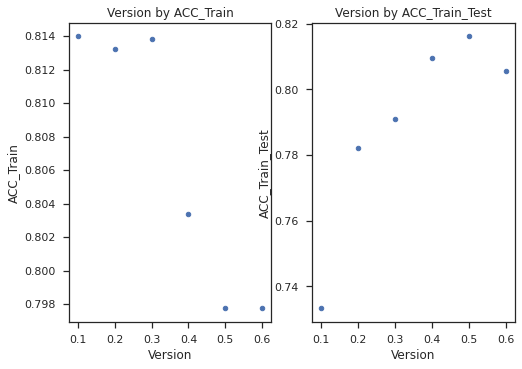

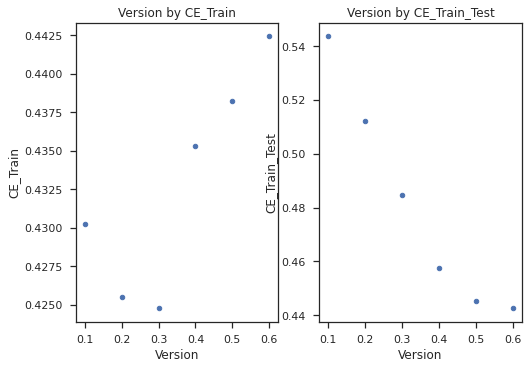

In [24]:
fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V1.plot(kind='scatter', x='Version', y='ACC_Train',title='Version by ACC_Train', ax=ax1)
res_validSizeTable_V1.plot(kind='scatter', x='Version', y='ACC_Train_Test',title='Version by ACC_Train_Test', ax=ax2)

fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V1.plot(kind='scatter', x='Version', y='CE_Train',title='Version by CE_Train', ax=ax1)
res_validSizeTable_V1.plot(kind='scatter', x='Version', y='CE_Train_Test',title='Version by CE_Train_Test', ax=ax2)

### This sumbition score on kaggle - 
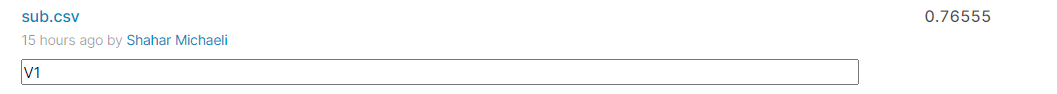

In [25]:
submission = pd.DataFrame({
        "PassengerId": data_test_SGD["PassengerId"],
        "Survived": y_sub
    })
submission.to_csv('./sub.csv',index=False)

Tried to implement MLPClassifier, neural networks logistic regression, and we can see the loss function and the accuarcy is higher,wich means it's doesnt improvent our results.

## Create new features from other features

Create new feature , 'FamilySize' , telling about if the passenger was on the boat alone, or with family.
Another feature, 'IsAlone' , indicate who is alone.


# Classification #2 - IsAlone , FamilySize (Without dropping SibSp and Parch cols)

In [26]:
data_SGD['FamilySize'] = data_SGD['SibSp'] + data_SGD['Parch'] + 1
data_test_SGD['FamilySize'] = data_test_SGD['SibSp'] + data_test_SGD['Parch'] + 1

data_test_SGD['IsAlone'] = 0
data_SGD['IsAlone'] = 0

data_SGD.loc[data_SGD['FamilySize']==1,'IsAlone'] = 1
data_test_SGD.loc[data_SGD['FamilySize']==1,'IsAlone'] = 1


In [27]:
res_validSizeTable_V2 = pd.DataFrame(columns = ['Version','CE_Train','CE_Train_Test','ACC_Train','ACC_Train_Test'])

In [28]:
X = data_SGD.drop(["Survived",'PassengerId'], axis=1)
t = data_SGD["Survived"]
X_test  = data_test_SGD.drop("PassengerId", axis=1).copy()

for i in range(1,7,1):
    X_train, X_train_test, t_train, t_train_test = sklearn.model_selection.train_test_split(X, t, test_size=i/10, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_train_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_train_test)

    y_sub = SGD_cls.predict(X_test)

    # print the accuracy score and CE loss of the train and test
    ACC_Train = SGD_cls.score(X_train, t_train)
    ACC_Train_Test = SGD_cls.score(X_train_test, t_train_test)
    CE_Train = metrics.log_loss(t_train, y_train_prob)
    CE_Train_Test =  metrics.log_loss(t_train_test, y_test_prob)
    
    results = results.append({'Version':2,'Valid Size':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)
    res_validSizeTable_V2 = res_validSizeTable_V2.append({'Version':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)


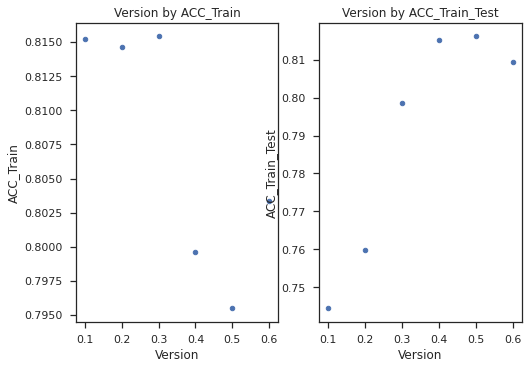

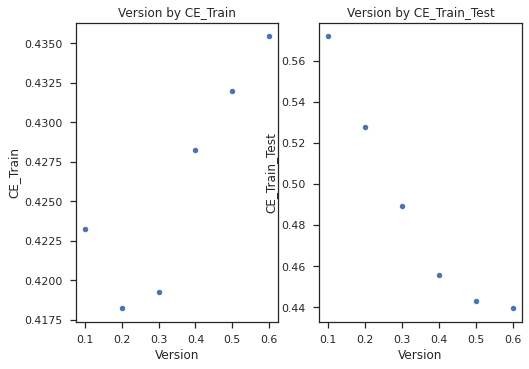

In [29]:
fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V2.plot(kind='scatter', x='Version', y='ACC_Train',title='Version by ACC_Train', ax=ax1)
res_validSizeTable_V2.plot(kind='scatter', x='Version', y='ACC_Train_Test',title='Version by ACC_Train_Test', ax=ax2)

fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V2.plot(kind='scatter', x='Version', y='CE_Train',title='Version by CE_Train', ax=ax1)
res_validSizeTable_V2.plot(kind='scatter', x='Version', y='CE_Train_Test',title='Version by CE_Train_Test', ax=ax2)

#### score 0.745
We see that classification with the new features bring us as the same loss like before, kaggle brought us a smaller result - 
The CE is better now , but the score from kaggle was lower.
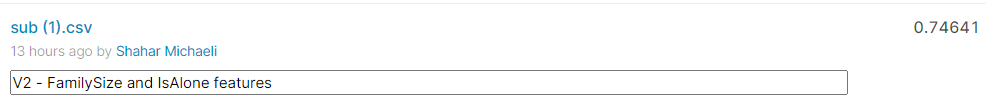

# Classification #3 - IsAlone, FamilySize features (SipSb,Parch DROPPED)

In [30]:
res_validSizeTable_V3 = pd.DataFrame(columns = ['Version','CE_Train','CE_Train_Test','ACC_Train','ACC_Train_Test'])

In [31]:
X = data_SGD.drop(["Survived",'PassengerId','SibSp','Parch'], axis=1)
t = data_SGD["Survived"]
X_test  = data_test_SGD.drop(["PassengerId",'SibSp','Parch'], axis=1).copy()

for i in range(1,7,1):
    X_train, X_train_test, t_train, t_train_test = sklearn.model_selection.train_test_split(X, t, test_size=i/10, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_train_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_train_test)

    y_sub = SGD_cls.predict(X_test)

    # print the accuracy score and CE loss of the train and test
    ACC_Train = SGD_cls.score(X_train, t_train)
    ACC_Train_Test = SGD_cls.score(X_train_test, t_train_test)
    CE_Train = metrics.log_loss(t_train, y_train_prob)
    CE_Train_Test =  metrics.log_loss(t_train_test, y_test_prob)
    
    results = results.append({'Version':3,'Valid Size':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)
    res_validSizeTable_V3 = res_validSizeTable_V3.append({'Version':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)


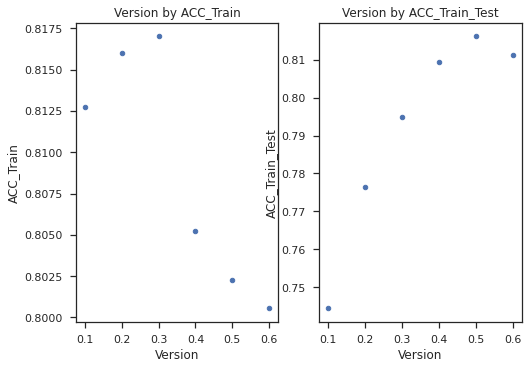

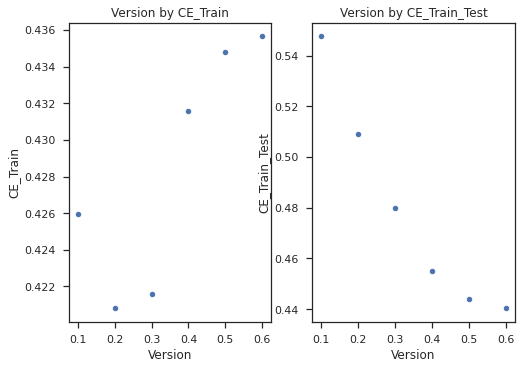

In [32]:
fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V3.plot(kind='scatter', x='Version', y='ACC_Train',title='Version by ACC_Train', ax=ax1)
res_validSizeTable_V3.plot(kind='scatter', x='Version', y='ACC_Train_Test',title='Version by ACC_Train_Test', ax=ax2)

fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V3.plot(kind='scatter', x='Version', y='CE_Train',title='Version by CE_Train', ax=ax1)
res_validSizeTable_V3.plot(kind='scatter', x='Version', y='CE_Train_Test',title='Version by CE_Train_Test', ax=ax2)

#### Kaggle Score - 0.75
The CE is now little more higher, like the first fit, but the score of kaggle has improvment.
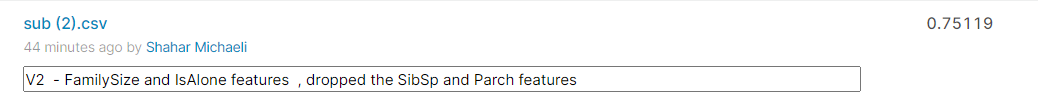

# Classification #4 - Edit 'Age' column to categorical (ordinal) values.
My guess is numeric values not helps like categorical values, and if we will change 'Age' column to be categorical, the learning will do better.
Split the values of age :
1. '0' - Age <= 18
2. '1' - 18 < Age <= 35
3. '2' - 35 < Age <= 49
4. '3' - 49 < Age <= 60
5. '4' - Age > 60


In [33]:
data_SGD_copy = data_SGD.copy()
data_test_SGD_copy = data_test_SGD.copy()
datas = [data_SGD_copy,data_test_SGD_copy]

for data in datas:
    data.loc[data['Age'] <= 18,'Age' ] = 0
    data.loc[(data['Age'] > 18) & (data['Age'] <= 35) ,'Age' ] = 1
    data.loc[(data['Age'] > 35) & (data['Age'] <= 49) ,'Age' ] = 2
    data.loc[(data['Age'] > 49) & (data['Age'] <= 60) ,'Age' ] = 3
    data.loc[(data['Age'] > 60) ,'Age' ] = 4
    
display(data_SGD_copy,data_test_SGD_copy)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
0              1         0       3    0  1.0      1      0   7.2500         0   
1              2         1       1    1  2.0      1      0  71.2833         1   
2              3         1       3    1  1.0      0      0   7.9250         0   
3              4         1       1    1  1.0      1      0  53.1000         0   
4              5         0       3    0  1.0      0      0   8.0500         0   
..           ...       ...     ...  ...  ...    ...    ...      ...       ...   
886          887         0       2    0  1.0      0      0  13.0000         0   
887          888         1       1    1  1.0      0      0  30.0000         0   
888          889         0       3    1  1.0      1      2  23.4500         0   
889          890         1       1    0  1.0      0      0  30.0000         1   
890          891         0       3    0  1.0      0      0   7.7500         2   

     FamilySize  IsAlone  
0             2        0  
1             2        0  
2             1        1  
3             2        0  
4             1        1  
..          ...      ...  
886           1        1  
887           1        1  
888           4        0  
889           1        1  
890           1        1  

[891 rows x 11 columns]

PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  \
0            892       3    0  1.0      0      0    7.8292         2   
1            893       3    1  2.0      1      0    7.0000         0   
2            894       2    0  4.0      0      0    9.6875         2   
3            895       3    0  1.0      0      0    8.6625         0   
4            896       3    1  1.0      1      1   12.2875         0   
..           ...     ...  ...  ...    ...    ...       ...       ...   
413         1305       3    0  1.0      0      0    8.0500         0   
414         1306       1    1  2.0      0      0  108.9000         1   
415         1307       3    0  2.0      0      0    7.2500         0   
416         1308       3    0  1.0      0      0    8.0500         0   
417         1309       3    0  1.0      1      1   22.3583         1   

     FamilySize  IsAlone  
0             1        0  
1             2        0  
2             1        1  
3             1        0  
4             3        1  
..          ...      ...  
413           1        1  
414           1        1  
415           1        1  
416           1        0  
417           3        0  

[418 rows x 10 columns]

In [34]:
res_validSizeTable_V4 = pd.DataFrame(columns = ['Version','CE_Train','CE_Train_Test','ACC_Train','ACC_Train_Test'])

In [35]:
X = data_SGD_copy.drop(["Survived",'PassengerId'], axis=1)
t = data_SGD_copy["Survived"]
X_test  = data_test_SGD_copy.drop("PassengerId", axis=1).copy()

for i in range(1,7,1):
    X_train, X_train_test, t_train, t_train_test = sklearn.model_selection.train_test_split(X, t, test_size=i/10, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_train_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_train_test)

    y_sub = SGD_cls.predict(X_test)

    # print the accuracy score and CE loss of the train and test
    ACC_Train = SGD_cls.score(X_train, t_train)
    ACC_Train_Test = SGD_cls.score(X_train_test, t_train_test)
    CE_Train = metrics.log_loss(t_train, y_train_prob)
    CE_Train_Test =  metrics.log_loss(t_train_test, y_test_prob)
    
    results = results.append({'Version':4,'Valid Size':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)
    res_validSizeTable_V4 = res_validSizeTable_V4.append({'Version':i/10,'CE_Train':CE_Train,'CE_Train_Test':CE_Train_Test,'ACC_Train':ACC_Train,'ACC_Train_Test':ACC_Train_Test},ignore_index=True)


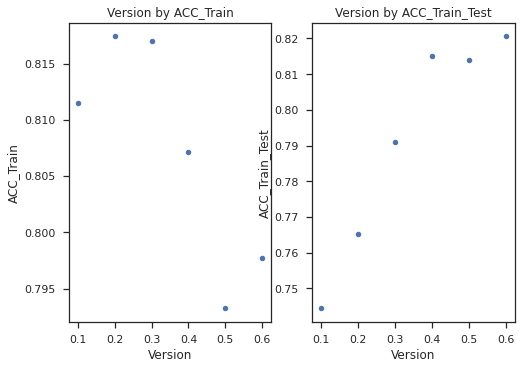

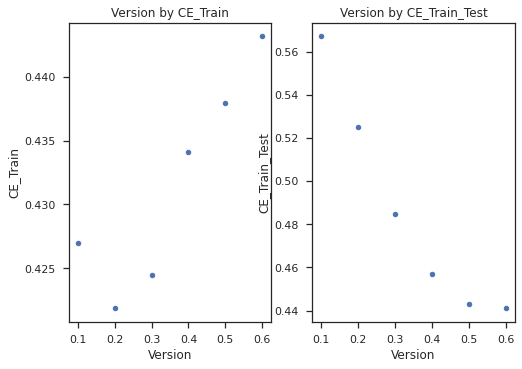

In [36]:
fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V4.plot(kind='scatter', x='Version', y='ACC_Train',title='Version by ACC_Train', ax=ax1)
res_validSizeTable_V4.plot(kind='scatter', x='Version', y='ACC_Train_Test',title='Version by ACC_Train_Test', ax=ax2)

fig, (ax1,ax2)= plt.subplots(1, 2)
res_validSizeTable_V4.plot(kind='scatter', x='Version', y='CE_Train',title='Version by CE_Train', ax=ax1)
res_validSizeTable_V4.plot(kind='scatter', x='Version', y='CE_Train_Test',title='Version by CE_Train_Test', ax=ax2)

The 'Age' column transform to ordinal values doesn't improve the results.
The loss function bring us the same result like the others.
Kaggle score is lower then the previous try, also the CE , same.
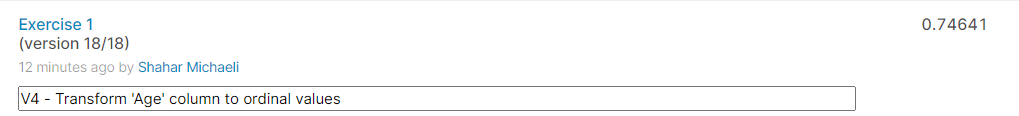

# Results



In [37]:
display(results)

Version  Valid Size  CE_Train  CE_Train_Test  ACC_Train  ACC_Train_Test
0       1.0         0.1  0.430284       0.543625   0.813983        0.733333
1       1.0         0.2  0.425529       0.512015   0.813202        0.782123
2       1.0         0.3  0.424790       0.484535   0.813804        0.791045
3       1.0         0.4  0.435311       0.457659   0.803371        0.809524
4       1.0         0.5  0.438238       0.445131   0.797753        0.816143
5       1.0         0.6  0.442422       0.442588   0.797753        0.805607
6       2.0         0.1  0.423259       0.571916   0.815231        0.744444
7       2.0         0.2  0.418221       0.527725   0.814607        0.759777
8       2.0         0.3  0.419259       0.489107   0.815409        0.798507
9       2.0         0.4  0.428257       0.455578   0.799625        0.815126
10      2.0         0.5  0.431954       0.443133   0.795506        0.816143
11      2.0         0.6  0.435444       0.439503   0.803371        0.809346
12      3.0         0.1  0.425929       0.547542   0.812734        0.744444
13      3.0         0.2  0.420815       0.509048   0.816011        0.776536
14      3.0         0.3  0.421598       0.480076   0.817014        0.794776
15      3.0         0.4  0.431557       0.454957   0.805243        0.809524
16      3.0         0.5  0.434770       0.443820   0.802247        0.816143
17      3.0         0.6  0.435647       0.440373   0.800562        0.811215
18      4.0         0.1  0.426971       0.567003   0.811486        0.744444
19      4.0         0.2  0.421860       0.524882   0.817416        0.765363
20      4.0         0.3  0.424473       0.484953   0.817014        0.791045
21      4.0         0.4  0.434139       0.456930   0.807116        0.815126
22      4.0         0.5  0.437979       0.442969   0.793258        0.813901
23      4.0         0.6  0.443178       0.441112   0.797753        0.820561

# Summary

The first exercise with Titanic data set was the first introduction in machine learning for me.
We can see there a lot of things can be done as an improvement to our machine learning model - new features as a combination from an original features and more.
The highest score which i achieved was 0.765, where the data set had original features, all the other things that I've been done with the data set make it worst.
Linear regression not the best tool to use - we saw in this notebook with two models (MLPClassifier and Classifier)